# Import Pustaka

In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import datetime

from scipy.stats import t
from scipy.stats import ttest_ind
from IPython.display import Math, Latex
from IPython.core.display import Image
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

%matplotlib inline

# Load Data

In [11]:
df = pd.read_csv("dataset\\nyc-rolling-sales.csv")
pd.set_option("display.max_columns", 22)

In [12]:
df_copy = df.copy() # copy dataset

In [13]:
df_copy.head() # menampilkan 5 data pertama

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [14]:
df_copy.tail() # menampilkan 5 data terakhir

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [15]:
# Dimensi dataset
df_copy.shape

(84548, 22)

In [16]:
# Menampilkan tipe-tipe kolom pada dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Berdasarkan output dari dimensi dan infromasi dataset, diketahui bahwa terdapat observasi 84548 baris dan variabelnya 22 kolom.

In [17]:
df_copy.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [18]:
df_copy.nunique()

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

# Data Cleaning dan prepocessing
## Drop Unnecessary Columns

In [19]:
# Menghapus kolom yang tidak diperlukan
df_copy.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BUILDING CLASS AT PRESENT       84548 non-null  object
 5   RESIDENTIAL UNITS               84548 non-null  int64 
 6   COMMERCIAL UNITS                84548 non-null  int64 
 7   TOTAL UNITS                     84548 non-null  int64 
 8   LAND SQUARE FEET                84548 non-null  object
 9   GROSS SQUARE FEET               84548 non-null  object
 10  YEAR BUILT                      84548 non-null  int64 
 11  TAX CLASS AT TIME OF SALE       84548 non-null  int64 
 12  BUILDING CLASS AT TIME OF SALE  84548 non-null

## Mengganti Tipe Beberapa Kolom menjadi Categorical

In [21]:
categoricals = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 
                'TAX CLASS AT PRESENT', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 
                'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT']

for col in categoricals:
    df_copy[col] = df_copy[col].astype('category')

## Membuat Kolom Keterangan Waktu, Bulan, dan Tahun

In [22]:
df_copy['SALE DATE'] = pd.to_datetime(df_copy['SALE DATE'])
df_copy['SALE MONTH'] = df_copy['SALE DATE'].dt.month_name()
df_copy['SALE YEAR'] = df_copy['SALE DATE'].dt.year

## Mengubah Beberapa Kolom menjadi Numerical

In [23]:
df_copy['LAND SQUARE FEET'] = pd.to_numeric(df_copy['LAND SQUARE FEET'], errors='coerce')
df_copy['GROSS SQUARE FEET'] = pd.to_numeric(df_copy['GROSS SQUARE FEET'], errors='coerce')
df_copy['SALE PRICE'] = pd.to_numeric(df_copy['SALE PRICE'], errors='coerce')

## Memeriksa Missing Values dan Drop Missing Values pada Dataset

In [24]:
missing = round((df_copy.isnull().sum())/len(df_copy)*100, 2)
missing = pd.DataFrame(missing)
missing = missing.rename(columns={0:'missing_values_percentage'})
missing

,missing_values_percentage
BOROUGH,0.00
NEIGHBORHOOD,0.00
BUILDING CLASS CATEGORY,0.00
TAX CLASS AT PRESENT,0.00
BUILDING CLASS AT PRESENT,0.00
RESIDENTIAL UNITS,0.00
COMMERCIAL UNITS,0.00
TOTAL UNITS,0.00
LAND SQUARE FEET,31.05
GROSS SQUARE FEET,32.66


Dari tabel missing values di atas, pada kolom land square feet terdapat 31% missing values, kolom gross square feet terdapat 33% missing values, dan kolom sale price terdapat 17% missing values. Karena kolon land square feet dan gross square feet mengandung missing values maka dianggap data yang tidak valid sehingga missing values akan didrop atau dihilangkan dari dataset.

In [25]:
df_copy = df_copy.dropna()

In [26]:
df_copy.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BUILDING CLASS AT PRESENT         False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
SALE MONTH                        False
SALE YEAR                         False
dtype: bool

In [27]:
df_copy.duplicated().sum()

959

Terdapat 959 baris yang akan dihilangkan atau didrop dari dataset.

In [28]:
df_copy = df_copy.drop_duplicates(df_copy.columns, keep='last')

## Mapping Kolom Borough

In [29]:
# Mengubah kategori angka menjadi nama borough
df_copy['BOROUGH'] = df_copy['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})

In [30]:
df_copy.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE DATE,SALE YEAR
count,47285.000000,47285.000000,47285.000000,4.728500e+04,4.728500e+04,4.728500e+04,47285,47285.000000
mean,2.514053,0.239717,2.770561,3.291470e+03,3.530269e+03,1.171341e+06,2017-02-25 20:36:21.393676544,2016.647393
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2016-09-01 00:00:00,2016.000000
25%,1.000000,0.000000,1.000000,1.463000e+03,8.840000e+02,1.247340e+05,2016-11-29 00:00:00,2016.000000
50%,1.000000,0.000000,1.000000,2.150000e+03,1.628000e+03,4.900000e+05,2017-02-27 00:00:00,2017.000000
75%,2.000000,0.000000,2.000000,3.088000e+03,2.520000e+03,8.400000e+05,2017-05-26 00:00:00,2017.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.210000e+09,2017-08-31 00:00:00,2017.000000
std,16.532690,10.915300,19.935527,3.071844e+04,2.916192e+04,1.352859e+07,NaN,0.477787


In [31]:
df_copy.describe(include='category')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
count,47285,47285,47285,47285,47285,47285,47285,47285
unique,5,251,47,11,160,151,4,160
top,Brooklyn,BEDFORD STUYVESANT,01 ONE FAMILY DWELLINGS,1,A1,1920,1,A1
freq,23395,1387,14301,30953,5224,4465,32151,5219


### Kolom Sale Price

Berdasarkan nilai maksimum pada kolom sale price adalah sekitar 2.000.000.000 USD, sedangkan nilai kuartil tiganya adalah sekitar 8.400.000 USD. Dengan begitu distribusi frekuensi kolom sale price dengan nilai harga penjualan di atas 10.000.000 USD tidak disertakan.

Text(0.5, 1.0, 'Distribusi Sale Price')

<Figure size 1000x500 with 0 Axes>

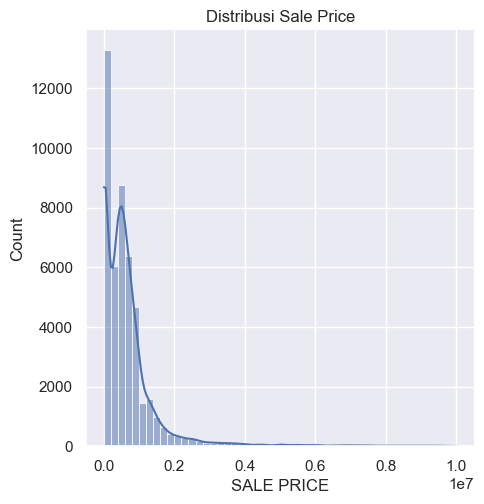

In [32]:
df_copy = df_copy[df_copy['SALE PRICE']<10000000].copy()
plt.figure(figsize=(10,5))
sns.displot(df_copy['SALE PRICE'], kde=True, bins=50)
plt.title('Distribusi Sale Price')

Masih terdapat nilai harga penjualan yang berbeda signifikan sehingga nilai harga penjualan diatas 5.000.000 USD tidak akan disertakan. Dan berdasarkan nilai kuartil 1, yaitu sekitar 100.000 USD, harga penjualan yang dibawah ini juga tidak akan disertakan dalam analisis. Dengan begitu, distribusi frekuensinya sebagai berikut. 

Text(0.5, 1.0, 'Distribusi Sale Price')

<Figure size 1000x500 with 0 Axes>

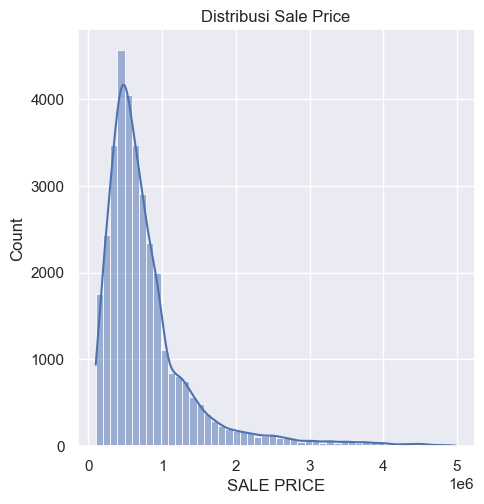

In [33]:
df_copy = df_copy[(df_copy['SALE PRICE'] > 100000) & (df_copy['SALE PRICE'] < 5000000)]
plt.figure(figsize=(10,5))
sns.displot(df_copy['SALE PRICE'], kde=True, bins=50)
plt.title('Distribusi Sale Price')

In [34]:
df_copy['SALE PRICE'].describe()

count    3.458700e+04
mean     7.965060e+05
std      6.536591e+05
min      1.007000e+05
25%      4.160950e+05
50%      6.160000e+05
75%      9.300000e+05
max      4.986410e+06
Name: SALE PRICE, dtype: float64

Dari analisis data di atas, dapat diketahui bahwa kolom sale price pada dataset awal memiliki nilai minimum 0 dan nilai maksimum sekitar 2.000.000.000 USD. Nilai dibawah kuartil 1 dan nilai diatas kuartil 3 dianggap sebagai outlier sehingga pada dataset akhir didapat nilai minimum sekitar 100.000 USD dan nilai maksimum sekitar 5.000.000 USD.

### Kolom Land Square Feet dan Gross Square Feet

Dari tabel statistik pada kolom land square feet dan gross square feet terdapat nilai pada kedua kolom ini sehingga baris yang mengandung nilai pada kedua kolom tersebut tidak disertakan dalam analisis karena ukuran lahan properti dalam satuan feet tidak memiliki kemungkinan bernilai 0.

In [35]:
df_copy = df_copy[df_copy['GROSS SQUARE FEET'] != 0]
df_copy = df_copy[df_copy['LAND SQUARE FEET'] != 0]

## Data Final

In [36]:
df_copy.reset_index(inplace=True)
df_copy.head()

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR
0,3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,September,2016
1,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,September,2016
2,172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,November,2016
3,174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S5,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,April,2017
4,195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,September,2016


In [37]:
df_copy.shape

(26690, 18)

In [38]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26690 entries, 0 to 26689
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26690 non-null  int64         
 1   BOROUGH                         26690 non-null  category      
 2   NEIGHBORHOOD                    26690 non-null  category      
 3   BUILDING CLASS CATEGORY         26690 non-null  category      
 4   TAX CLASS AT PRESENT            26690 non-null  category      
 5   BUILDING CLASS AT PRESENT       26690 non-null  category      
 6   RESIDENTIAL UNITS               26690 non-null  int64         
 7   COMMERCIAL UNITS                26690 non-null  int64         
 8   TOTAL UNITS                     26690 non-null  int64         
 9   LAND SQUARE FEET                26690 non-null  float64       
 10  GROSS SQUARE FEET               26690 non-null  float64       
 11  YE

In [39]:
df_copy.drop('index', axis=1, inplace=True)

In [40]:
df_copy.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE DATE,SALE YEAR
count,26690.000000,26690.000000,26690.000000,2.669000e+04,2.669000e+04,2.669000e+04,26690,26690.000000
mean,2.079430,0.202360,2.280555,3.605680e+03,2.689596e+03,8.066531e+05,2017-02-26 03:06:43.836642816,2016.647433
min,0.000000,0.000000,0.000000,2.000000e+02,1.200000e+02,1.007000e+05,2016-09-01 00:00:00,2016.000000
25%,1.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,4.400000e+05,2016-11-29 00:00:00,2016.000000
50%,2.000000,0.000000,2.000000,2.500000e+03,1.815000e+03,6.250000e+05,2017-02-27 00:00:00,2017.000000
75%,2.000000,0.000000,2.000000,3.846750e+03,2.508000e+03,9.250000e+05,2017-05-26 00:00:00,2017.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,4.975000e+06,2017-08-31 00:00:00,2017.000000
std,12.929243,13.895957,19.054640,3.210219e+04,2.519181e+04,6.458509e+05,NaN,0.477778


## Analisis Data

### Distribusi Statistik Harga Penjualan Unit Properti di NYC

In [41]:
df_copy["SALE PRICE"].describe()

count    2.669000e+04
mean     8.066531e+05
std      6.458509e+05
min      1.007000e+05
25%      4.400000e+05
50%      6.250000e+05
75%      9.250000e+05
max      4.975000e+06
Name: SALE PRICE, dtype: float64

In [42]:
df_copy['SALE PRICE'].mode()[0]

700000.0

In [43]:
df_copy['SALE PRICE'].mean()

806653.0688272761

In [44]:
df_copy['SALE PRICE'].median()

625000.0

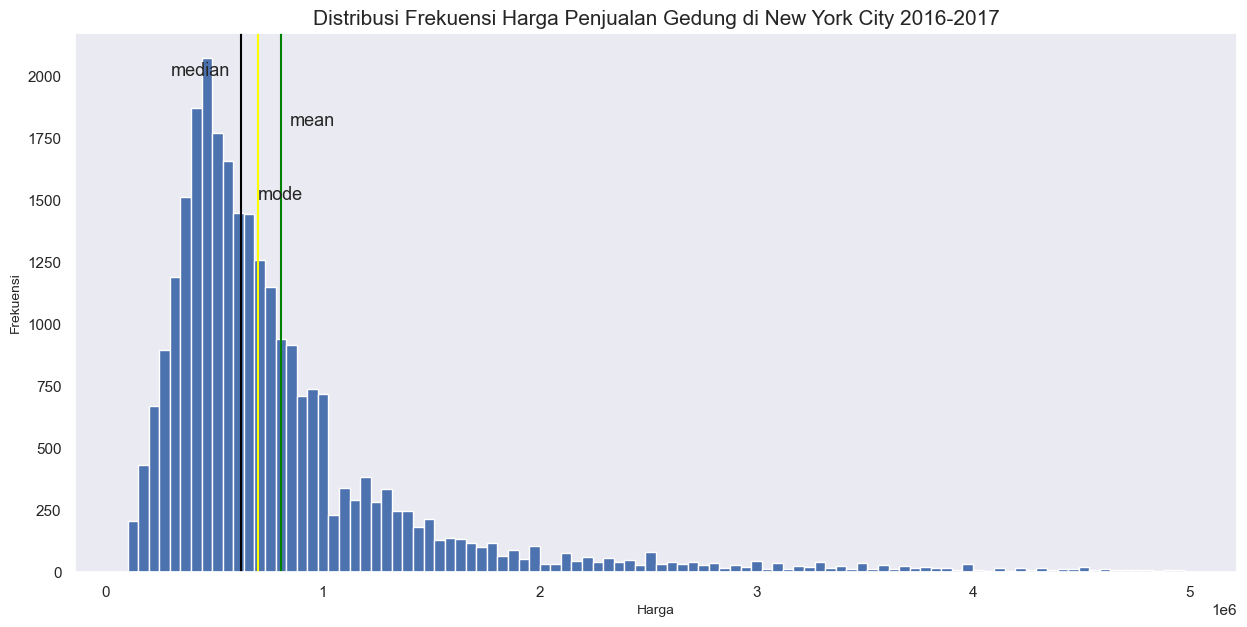

In [45]:
df_copy['SALE PRICE'].plot(kind='hist', figsize=(15,7), bins=100, color='b')
plt.title('Distribusi Frekuensi Harga Penjualan Gedung di New York City 2016-2017', fontsize=15)
plt.xlabel('Harga', fontsize=10)
plt.ylabel('Frekuensi', fontsize=10)
plt.axvline(df_copy['SALE PRICE'].mean(), c='green')
plt.axvline(df_copy['SALE PRICE'].median(), c='black')
plt.axvline(df_copy['SALE PRICE'].mode()[0], c='yellow')
plt.text(300000, 2000, 'median', fontsize=13)
plt.text(850000, 1800, 'mean', fontsize=13)
plt.text(700000, 1500, 'mode', fontsize=13)
plt.grid()

Berdasarkan plot di atas, distribusi statistik harga penjualan properti di New York dengan frekuensi tertinggi harga properti dibawah 1.000.000 USD. Dengan rata-rata penjualan properti sebesar 800.000 USD, memiliki nilai tengah harga penjualan properti sebesar 625.000 USD, dan properti yang paling banyak terjual dengan harga 700.000 USD.

In [46]:
print('Range: ', np.ptp(df_copy['SALE PRICE']))
print('Variance: ', df_copy['SALE PRICE'].var())
print('Standar Deviation: ', (df_copy['SALE PRICE'].var())**0.5)
print('Skewness: ', scipy.stats.skew(df_copy['SALE PRICE'], bias=False))

Range:  4874300.0
Variance:  417123378960.759
Standar Deviation:  645850.8953007335
Skewness:  2.8182184686691394


Dari penyebaran harga properti di atas, diketahui bahwa nilai varians dan standar deviasinya cukup besar yang artinya data sangat bervariasi sehingga rata-rata jarak penyimpanan setiap titik data terhadap srat-ratanya juga sangat besar. Dari harga penjualan properti juga memiliki nilai skewness atau kemiringan yang positif yang artinya nilai rata-rata lebih besar dari tengahnya. Terakhir, range data di atas adalah 4.885.710 USD.

### Apakah ada perbedaan nilai statistik harga penjualan berdasarkan wilayahnya?


In [47]:
df_borough = df_copy[['BOROUGH','SALE PRICE']]
df_borough_mean = df_borough.groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()

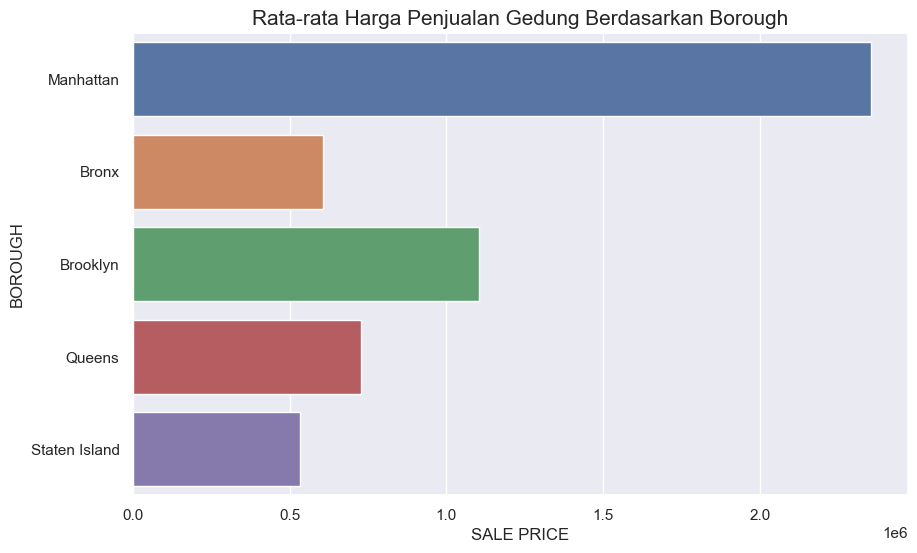

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'BOROUGH', x = 'SALE PRICE', data = df_borough_mean)
plt.title('Rata-rata Harga Penjualan Gedung Berdasarkan Borough', fontsize=15)
plt.show()

Dari plot di atas, dapat diketahui bahwa wilayah Manhattan memiliki rata-rata harga penjualan properti tertinggi, sedangkan wialayah yang memiliki rata-rata harga penjualan properti terendah adalah Staten Island. Dapat disimpulkan bahwa perbedaan rata-rata antara wilayah Manhattan dengan wilayah yang lainnya cukup signifikan. Berikut merupakan tampilan nilai varians dan standar deviasi masing-masing wilayah.

In [49]:
# Membuat tabel nilai harga penjualan berdasarkan masing-masing borough
df_m = df_borough[df_borough['BOROUGH']=='Manhattan']
df_bx = df_borough[df_borough['BOROUGH']=='Bronx']
df_brk = df_borough[df_borough['BOROUGH']=='Brooklyn']
df_q = df_borough[df_borough['BOROUGH']=='Queens']
df_si = df_borough[df_borough['BOROUGH']=='Staten Island']

# Menampilkan nilai varians dan standar deviasi masing-masing borough
print('Variance and Standar Deviation each Borough:\n')
print('Manhattan: ', round(df_m['SALE PRICE'].var(), 2), 'and', round((df_m['SALE PRICE'].var())**0.5, 2))
print('Bronx: ', round(df_bx['SALE PRICE'].var(), 2), 'and', round((df_bx['SALE PRICE'].var())**0.5, 2))
print('Brooklyn: ', round(df_brk['SALE PRICE'].var(), 2), 'and', round((df_brk['SALE PRICE'].var())**0.5, 2))
print('Queens: ', round(df_q['SALE PRICE'].var(), 2), 'and', round((df_q['SALE PRICE'].var())**0.5, 2))
print('Staten Island: ', round(df_si['SALE PRICE'].var(), 2), 'and', round((df_si['SALE PRICE'].var())**0.5, 2))

Variance and Standar Deviation each Borough:

Manhattan:  1514969103563.49 and 1230840.81
Bronx:  330669796970.95 and 575038.95
Brooklyn:  644943417799.32 and 803083.69
Queens:  208637346484.45 and 456768.37
Staten Island:  75226541185.85 and 274274.57


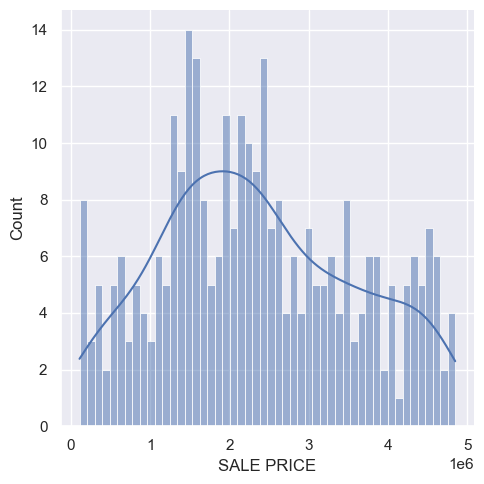

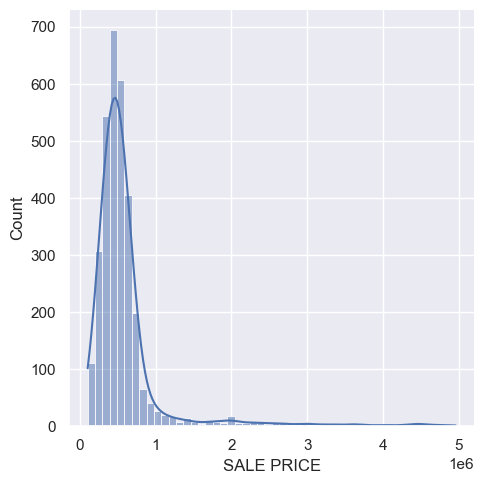

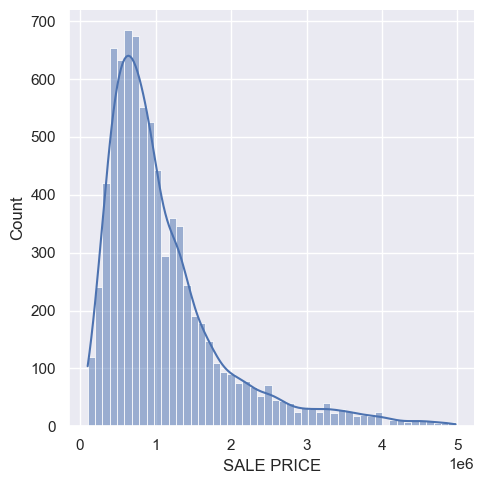

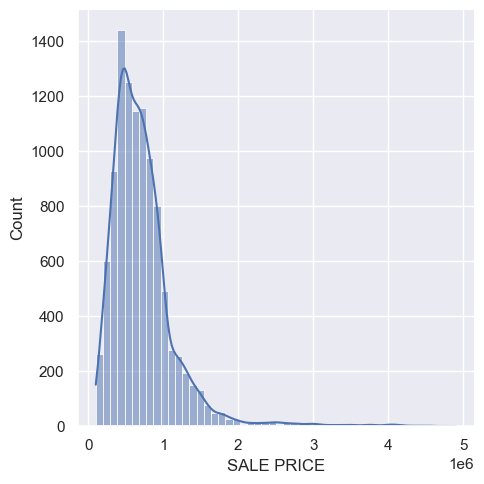

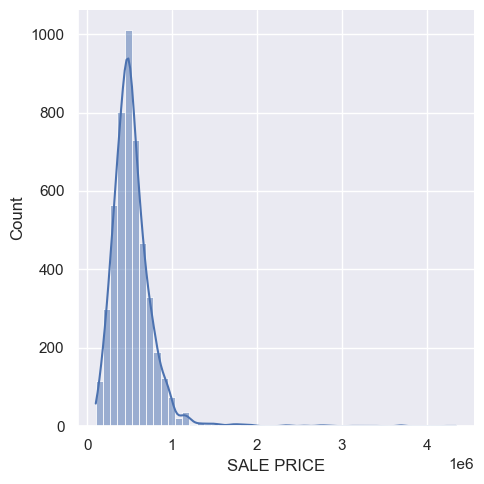

In [50]:
sns.displot(df_m['SALE PRICE'], kde=True, bins=50)
sns.displot(df_bx['SALE PRICE'], kde=True, bins=50)
sns.displot(df_brk['SALE PRICE'], kde=True, bins=50)
sns.displot(df_q['SALE PRICE'], kde=True, bins=50)
sns.displot(df_si['SALE PRICE'], kde=True, bins=50)

Dari output di atas, diketahui bahwa wilayah Bronx, Brooklyn, Queens, dan Staten Island tidak memiliki perbedaan distribusi frekuensi nilai harga penjualan properti yang signifikan. Namun, pada wilayah Manhattan memiliki distribusi frekuensi yang paling berbeda dengan wilayah lainnya. Jika dilihat dari nilai varians dan standar deviasi, wilayah Manhattan memiliki nilai varians dan standar deviasi tertinggi dengan artian nilai penjualan properti di Manhattan sangat bervariasi dibandingkan dengan wilayah lainnya.

### Confidence Interval untuk Rata-rata Harga Penjualan Properti di NYC

In [51]:
dd = df_copy['SALE PRICE']

m = dd.mean()
s = dd.std()
dof = len(dd)-1

confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

values = np.round((m-s*t_crit/np.sqrt(len(dd)), m+s*t_crit/np.sqrt(len(dd))), 2)

print(values)

[798904.42 814401.71]


Dari output di atas, rata-rata harga penjualan properti di NYC berada di antara 789.616 USD sampai 803.395 USD dengan peluangnya sebesar 0.95 atau 95%.

### Hypothesis Testing untuk Harga Penjualan Properti di Bronx dan Staten Island

Dari analisis sebelumnya diketahui bahwa wilayah Bronx dan Staten Island tidak memiliki perbedaan distribusi yang signifikan sehingga memunculkan asumsi apakah rata-rata harga penjualan properti di Bronx dan Staten Island sama atau tidak. Dapat dilakukan dengan menggunakan uji statistik t, dengan hipotesis sebagai berikut.

H0: Rata-rata harga penjualan di Bronx dan Staten Island sama.

H1: Rata-rata harga penjualan di Bronx dan Staten Island tidak sama.

stat=7.607, p=0.000
Probably different distribution


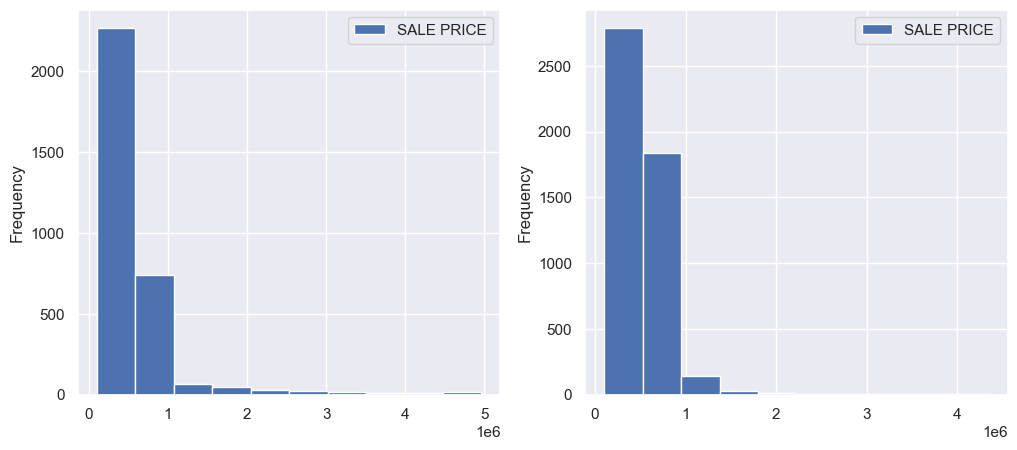

In [52]:
df_sp = df_copy[['BOROUGH','SALE PRICE']]
df_bronx = df_sp[df_sp['BOROUGH']=='Bronx'].drop('BOROUGH', axis=1)
df_si = df_sp[df_sp['BOROUGH']=='Staten Island'].drop('BOROUGH', axis=1)

fig = plt.figure(figsize=(12,5))
df_bronx.plot(kind='hist', ax=fig.add_subplot(1,2,1))
df_si.plot(kind='hist', ax=fig.add_subplot(1,2,2))

stat, p = ttest_ind(df_bronx, df_si)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distribution')

Dari output di atas, nilai p-value < 0.05 yang artinya H0 ditolak sehingga rata-rata harga penjualan di Bronx dan Staten Island tidak sama. Dengan begitu dapat disimpulkan bahwa wilayah juga memengaruhi harga penjualan properti.